In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [107]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Stock price movements analysis\\DJIA\\DJIA(ClosingVal-today).csv")

In [108]:
df.head()

Date         Open         High          Low     Volume        Close
0  8/11/2008  11729.66992  11867.11035  11675.53027  183190000  11734.32031
1  8/12/2008  11781.70020  11782.34961  11601.51953  173590000  11782.34961
2  8/13/2008  11632.80957  11633.78027  11453.33984  182550000  11642.46973
3  8/14/2008  11532.07031  11718.28027  11450.88965  159790000  11532.95996
4  8/15/2008  11611.20996  11709.88965  11599.73047  215040000  11615.92969

In [109]:
df.tail()

Date         Open         High          Low     Volume        Close
1983  6/27/2016  17355.21094  17355.21094  17063.08008  138740000  17400.75000
1984  6/28/2016  17190.50977  17409.72070  17190.50977  112190000  17140.24023
1985  6/29/2016  17456.01953  17704.50977  17456.01953  106380000  17409.72070
1986  6/30/2016  17712.75977  17930.60938  17711.80078  133030000  17694.67969
1987   7/1/2016  17924.24023  18002.38086  17916.91016   82160000  17929.99023

In [110]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [111]:
df.shape

(1988, 6)

In [112]:
del df['Date']

In [113]:
X=df
X=np.array(X.drop(['Close'],1))
y=np.array(df['Close'])

In [114]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
xtrain.shape

(1590, 4)

In [116]:
ytrain.shape

(1590,)

In [117]:
xtest.shape

(398, 4)

In [118]:
ytest.shape

(398,)

### LASSO

In [119]:
from sklearn.linear_model import Lasso

In [120]:
ls = Lasso()
ls.fit(xtrain, ytrain)

Lasso()

In [121]:
ls_predictions = ls.predict(xtest)
ls_predictions

array([15528.80807197, 10731.11687238, 15697.90524421,  8275.07529194,
       15307.59729404, 17765.1593379 , 17830.31705234, 18105.98841248,
       12584.47866947, 16258.34129884,  8865.89309178, 18011.83528946,
       12791.64627894, 11458.95366362,  7933.76053714, 15804.3232945 ,
       11430.26106503, 13172.04150256, 11874.38365255, 10397.75747398,
       17649.39307407,  9286.50597347, 17821.09304695, 17169.89233655,
       18035.43761463, 11046.75494553, 10368.35916358, 16424.20617914,
       16295.73267669, 18116.05227618, 16584.81616657,  8800.07014327,
       15974.18176672,  9063.8840731 , 14844.46707255, 12454.45661712,
       17449.6559074 ,  8668.06503605, 13472.0684964 , 17485.3278624 ,
       13228.98002272, 14701.31457964, 15194.40644017, 17082.19354698,
       17118.94970782, 11124.07084045, 16449.40988086, 16869.59600703,
       12423.94848956, 13254.31819123, 10195.60867737, 17667.91219765,
       13566.00730389, 11977.87243721, 16805.3965787 ,  9973.69382213,
      

In [122]:
def mda(ytest:np.ndarray,predicted:np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(ytest[1:]-ytest[:-1])== np.sign(predicted[1:]- predicted[:-1])).astype(int))

In [123]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ls_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ls_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ls_predictions)))
print('Mean Directional Accuracy:', mda(ytest, ls_predictions))

Mean Absolute Error: 3.819203274737527
Mean Squared Error: 48.69402075437215
Root Mean Squared Error: 6.978110113373975
Mean Directional Accuracy: 1.0


### Predicting for 25th March

In [132]:
ls.predict([[32346.81,32672.69,32071.41,411990000]])

array([32343.98628365])

### Graph

In [125]:
import matplotlib.pyplot as plt

In [126]:
newdf=pd.read_csv("C:\\Users\\User\\Desktop\\Stock price movements analysis\\DJIA\\DJIA(DataFrom25March)-Today.csv")

In [127]:
newdf.head()

Date      Open      High       Low       Volume     Close
0  3/25/2021  32346.81  32672.69  32071.41  411990000.0  32619.48
1  3/26/2021  32681.07  33098.83  32681.07  382170000.0  33072.88
2  3/29/2021  33087.55  33259.00  32905.13  351610000.0  33171.37
3  3/30/2021  33127.88  33170.93  32988.92  307510000.0  33066.96
4  3/31/2021  33116.04  33173.77  32980.57  414140000.0  32981.55

In [128]:
keep_columns=['Open','High','Low','Volume']
newxval=newdf[keep_columns]

In [129]:
predictions = ls.predict(newxval)

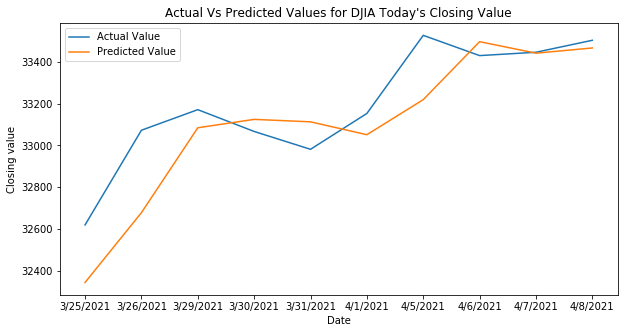

In [131]:
plt.figure(figsize=(10,5))
plt.plot(newdf['Date'],newdf['Close'], label ='Actual Value')
plt.plot(newdf['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for DJIA Today's Closing Value")
plt.legend()